# Loans Data Explanation

## Dataset Overview
The `Loans dataset` contains 113,937 loans since 2005/2014 with 81 variables on each loan, including loan amount, current loan status, borrower income, borrower occupation, and many others. <br>
It's contains qualititave varibles such as loan status, loan category, borrower state and occupation and others. Also, it's contains quantitave variables such as loan amount, term, borrower income and others.

## Investigation Overview
In this investigation, I want to look what factors of difference columns (borrower income, occupation, state, etc.) that affect on loans outcome.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df_loan = df[['ListingNumber','ListingCreationDate','Term','LoanStatus','ClosedDate','ListingCategory (numeric)','BorrowerState',
              'Occupation','EmploymentStatus','EmploymentStatusDuration','IsBorrowerHomeowner','IncomeRange','IncomeVerifiable',
              'StatedMonthlyIncome','TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments',
              'ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate', 'LoanOriginalAmount']].copy()

In [4]:
# rename column
df_loan.rename(columns = {'ListingCategory (numeric)':'ListingCategory'}, inplace = True) 

In [5]:
# check if contains duplicate
df_loan.duplicated().sum()

871

In [6]:
# drop duplicates rows
df_loan.drop_duplicates(inplace = True)

In [7]:
# create new dataset for borrower they have prosper loan
df_prosloan = df_loan[['ListingNumber','TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments',
                      'ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate']].copy()

# drop col
df_loan.drop(['TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments',
                      'ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate'], axis=1, inplace=True)

## Loans Status Frequencies
The following chart illustrates the most loans status exists in the dataset.

In [8]:
base_color = sb.color_palette()[0]
st_order = df_loan['LoanStatus'].value_counts().index

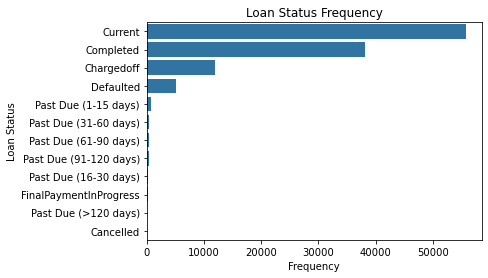

In [9]:
# display loan status
sb.countplot(data = df_loan, y = 'LoanStatus', color = base_color, order = st_order);
plt.title('Loan Status Frequency')
plt.xlabel('Frequency')
plt.ylabel('Loan Status');

## Loans Categories Frequencies
The following chart illustrates the most loans category exists in the dataset.

In [10]:
# sort loan category listing
cat_order = df_loan['ListingCategory'].value_counts().index

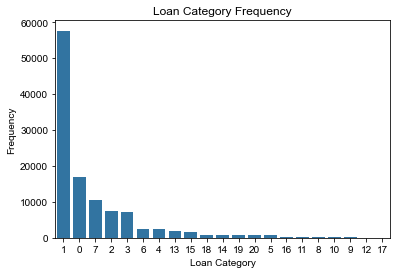

In [11]:
# change the figure size
sb.countplot(data = df_loan, x = 'ListingCategory', color = base_color, order = cat_order);
sb.set(rc={'figure.figsize':(15,10)});
plt.title('Loan Category Frequency')
plt.xlabel('Loan Category')
plt.ylabel('Frequency');

> The category of the listing that the borrower selected when posting their listing:<br> 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

## Borrowers State Proportion
The following chart illustrates the most borrowers state exists in the dataset.

In [12]:
# display the percentage of borrower state
n_state = df_loan['BorrowerState'].value_counts().sum()
state_order = df_loan['BorrowerState'].value_counts().index

max_state = df_loan['BorrowerState'].value_counts()

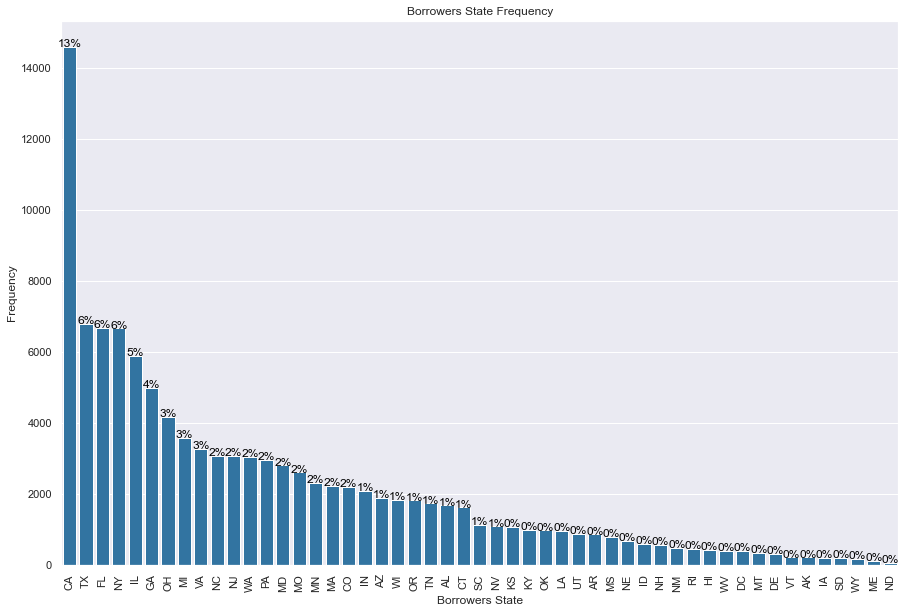

In [13]:
sb.countplot(data=df_loan, x='BorrowerState', color=base_color, order=state_order);
locs, labels = plt.xticks(rotation=90) 
for loc, label in zip(locs, labels):
    count = max_state[label.get_text()]
    pct_string = '{:d}%'.format(int(100*count/n_state))
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

# change the figure size
sb.set(rc={'figure.figsize':(15,10)});
plt.title('Borrowers State Frequency')
plt.xlabel('Borrowers State')
plt.ylabel('Frequency');

## Borrowers Occupation Frequencies
The following chart illustrates the most borrowers occupation exists in the dataset.

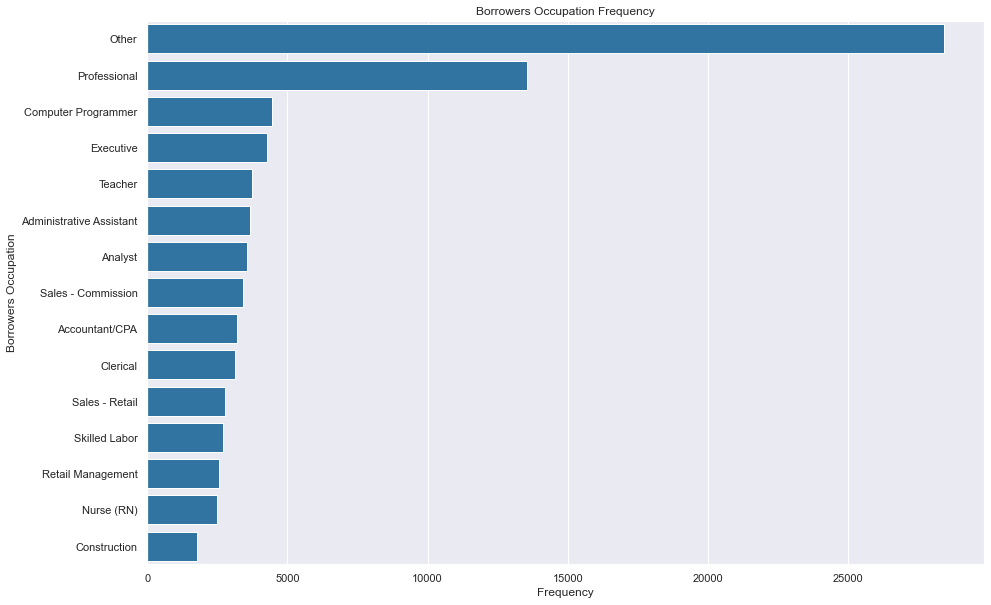

In [14]:
# display top borrower occupation
oc_order = df_loan['Occupation'].value_counts().nlargest(15).index
sb.countplot(data = df_loan, y = 'Occupation', color = base_color, order = oc_order);
plt.title('Borrowers Occupation Frequency')
plt.xlabel('Frequency')
plt.ylabel('Borrowers Occupation');

## Borrowers Own Home
The following chart illustrates the borrowers they own home exists in the dataset.

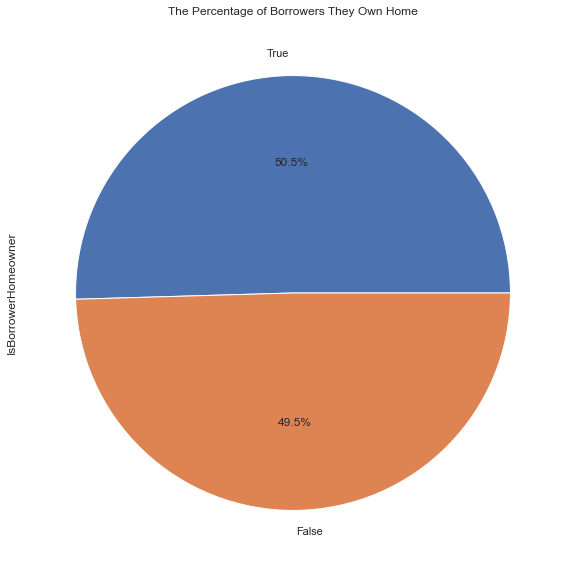

In [15]:
# is the borrower own a home?
df_loan.IsBorrowerHomeowner.value_counts().plot(kind = 'pie', autopct= '%1.1f%%');
plt.title('The Percentage of Borrowers They Own Home');

## Loans Amount Frequencies
The following chart illustrates the most loans amount frequencies exists in the dataset.

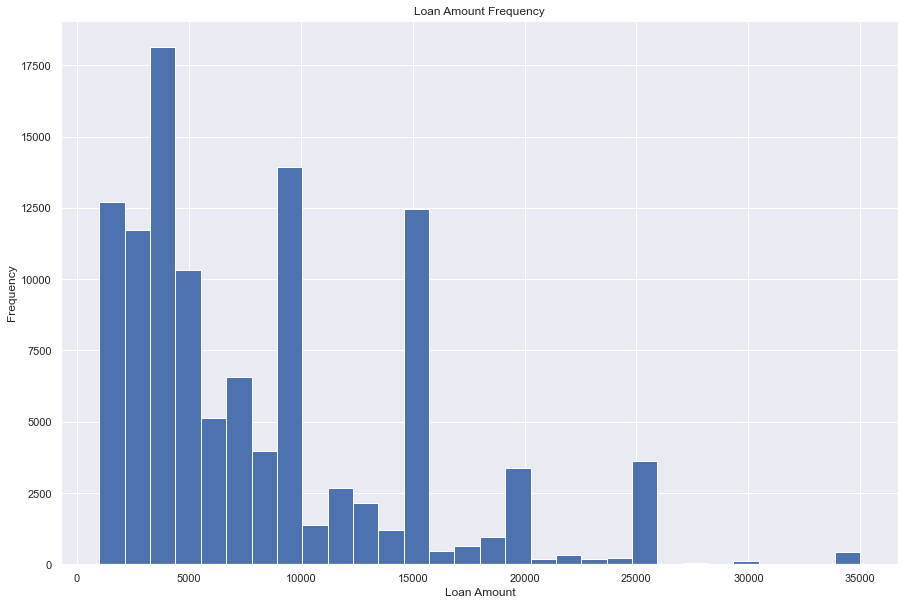

In [16]:
# display loans amount
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = 30);
plt.title('Loan Amount Frequency')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency');

## Relation Between Loan Amount and Borrower Income
The following chart illustrates the relation between quantitative vs. quantitative variables useing scatter plot for exploring loan amount and borrower income. <br>
Regarding to the correlation coefficient between them which is equal to 0.2, there is positive and weak relationship.

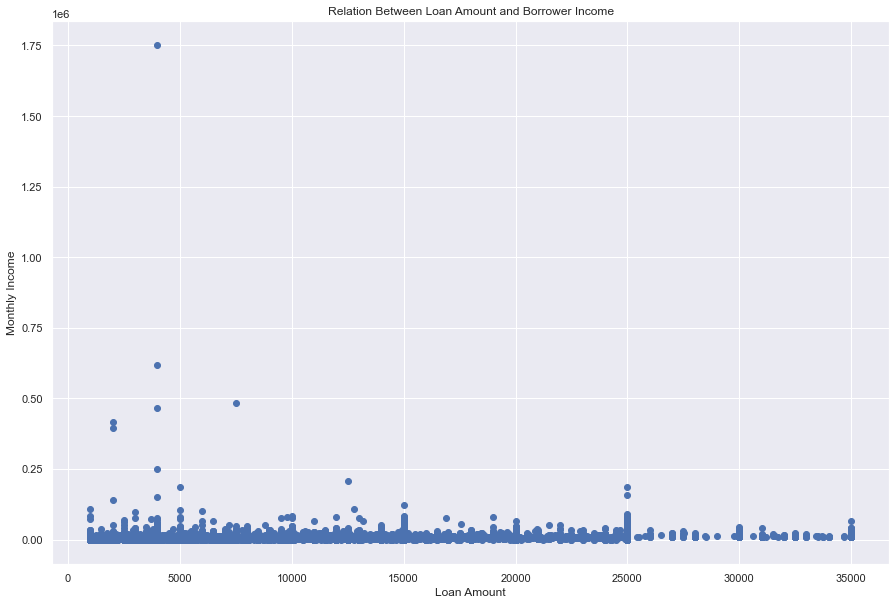

In [17]:
# relation between loan amount and borrower income
plt.scatter(data = df_loan, x = 'LoanOriginalAmount', y = 'StatedMonthlyIncome')
plt.title('Relation Between Loan Amount and Borrower Income')
plt.xlabel('Loan Amount')
plt.ylabel('Monthly Income');

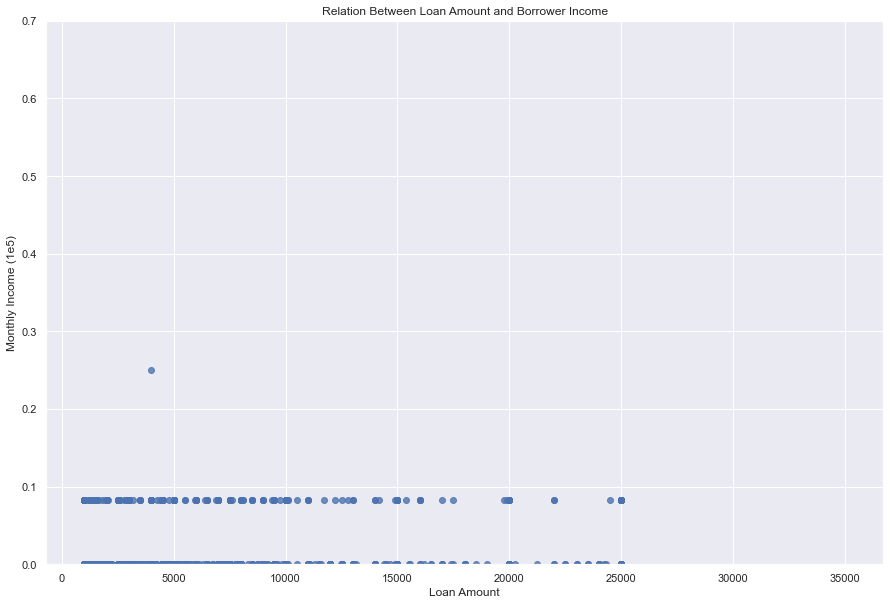

In [18]:
# employ transparency and jitter 
sb.regplot(data = df_loan, x = 'LoanOriginalAmount', y = 'StatedMonthlyIncome', truncate=False, x_jitter=0.3)
plt.ylim(0, 0.7)
plt.title('Relation Between Loan Amount and Borrower Income')
plt.xlabel('Loan Amount')
plt.ylabel('Monthly Income (1e5)');

## Relation Between Loan Status and Rest Monthly Payment
The following chart illustrates the relation between quantitative vs. qualitative variables using violin plot for exploring the relation between borrower they are losing thier occupation before completing loan payments and loan status.

In [19]:
# make loan status ordered
loan_status = ['Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress', 'Chargedoff', 'Cancelled']
lstatus = pd.api.types.CategoricalDtype(ordered=True, categories=loan_status)

# taking the borrowers they have loan duration more than their employment duration 
emp = df_loan.loc[(df_loan.EmploymentStatusDuration < df_loan.Term),['EmploymentStatusDuration', 'Term', 'LoanStatus']].copy()
# the rest loan months after employment contract ended = the loan months - the rest months in employment
emp['EmploymentRest'] = emp['Term'] - emp['EmploymentStatusDuration']
emp['Lstatus'] = df_loan['LoanStatus'].astype(lstatus);

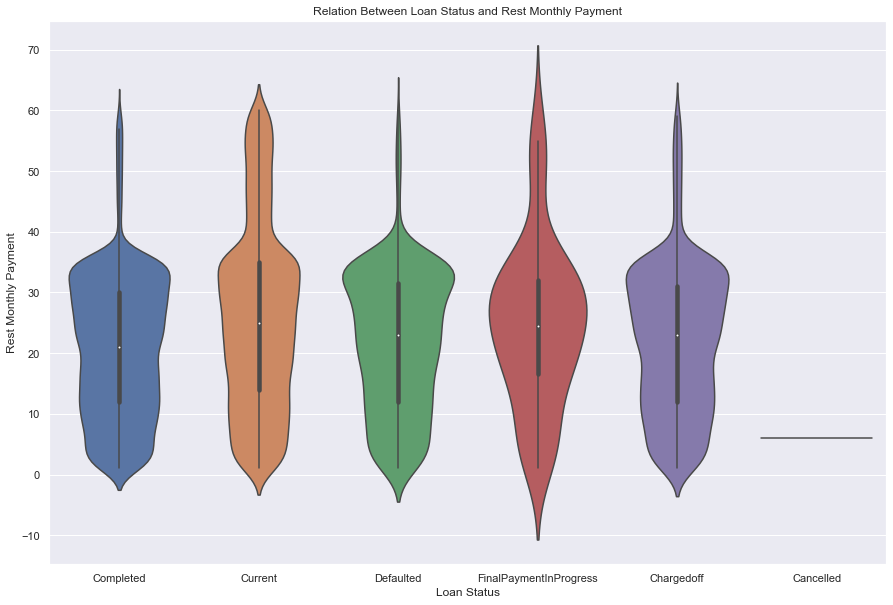

In [20]:
# relation between the employment contract duration < loan duration .. Is affect on loan status?
sb.violinplot(data= emp, x='Lstatus', y= 'EmploymentRest')
plt.title('Relation Between Loan Status and Rest Monthly Payment')
plt.xlabel('Loan Status')
plt.ylabel('Rest Monthly Payment');

## Relation Between Income Range and The Payment Months of Loan
The following chart illustrates the relation between income range and the payment months of loan.

In [21]:
# take the data with income range
income_range = df_loan.loc[df_loan['IncomeRange'].isin(['$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999','$100,000+'])].copy()


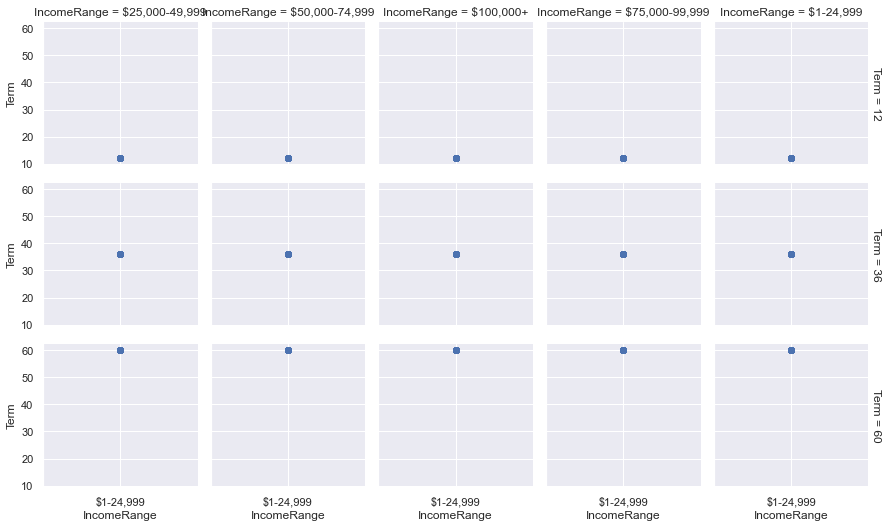

In [22]:
# relation between income range and the payment months of loan
g = sb.FacetGrid(data = income_range, col = 'IncomeRange', row = 'Term', height = 2.5, margin_titles = True);
g.map(plt.scatter, 'IncomeRange', 'Term');

In [23]:
# re-arrange the data
pros_loan = {'#ofLoans': [1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8],
                              'Total': [219842, 156859, 75895,  26747,6731, 1671, 422, 37, 6771, 4049, 1813, 624, 153, 36, 25, 1, 542, 318, 147, 40, 4, 6, 4, 2],
                             'PaymentStatus': ['on time', 'on time', 'on time', 'on time', 'on time', 'on time', 'on time', 'on time',
                                       'less month late', 'less month late','less month late','less month late','less month late','less month late','less month late','less month late',
                                       'plus month late', 'plus month late','plus month late','plus month late','plus month late','plus month late','plus month late','plus month late']}
total_pros_loan = pd.DataFrame(pros_loan)
total_pros_loan.head()

,#ofLoans,Total,PaymentStatus
0,1,219842,on time
1,1,156859,on time
2,1,75895,on time
3,2,26747,on time
4,2,6731,on time


## Relation Between Total Prosper Loans and Payment Status
The following chart illustrates the relation between  number of prosper loans and payment status, either on time, late less a month or late plus a month. With each other loan for a borrower, the payment status is tend to late.

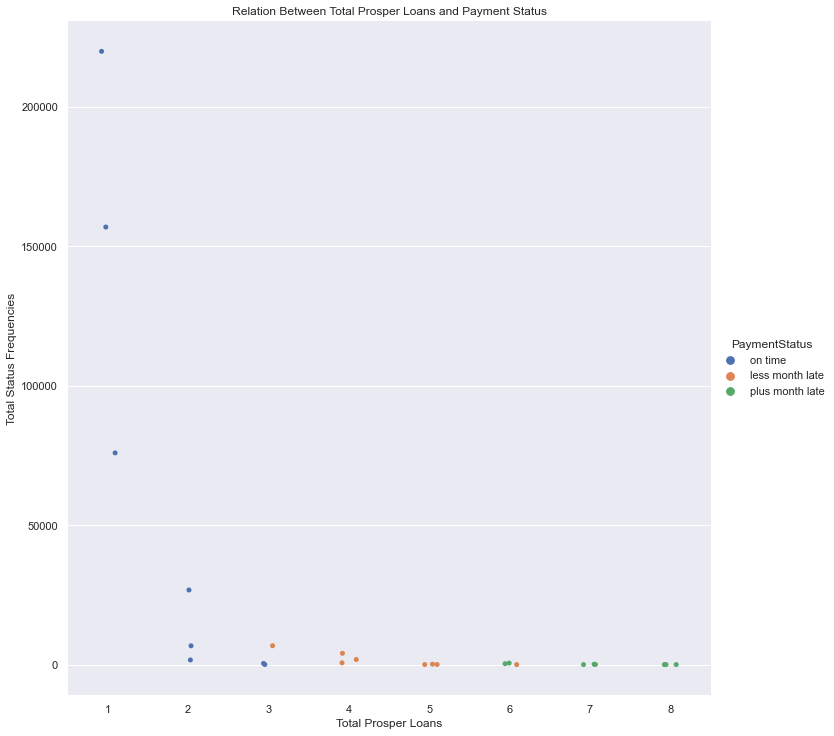

In [26]:
# display the relation between number of prosper loans vs. (payment on time, late < month and late > month).. 
sb.catplot(data=total_pros_loan, x='#ofLoans', y='Total', hue='PaymentStatus', height=10);
plt.title('Relation Between Total Prosper Loans and Payment Status')
plt.xlabel('Total Prosper Loans')
plt.ylabel('Total Status Frequencies');

## Conclusion
- The most exist loans status are current, and completed. 
- The most exist loans categories are for debt consolidation, auto, home improvement, respectively. 
- The most exist borrowers state, CA by 13% followed by TX, FL and NY equally by 6%. 
- The most exist borrower's occupation, professional followed by computer programmer and executive.
- There is 50.5% of borrowers they owner home while there is 49.5% of them they didn't own.
- The range of most loans amount is between 5000 and 15000.
- There is a positive and weak relationship between the loan amount and the borrower income. 
- Finally, if the prosper loans was a lot, that will lead to late occurring in payment, either in less than a month or plus a month.

In [29]:
!jupyter nbconvert Loans_Data_Explanation_Part2.ipynb --to slides --no-input --no-prompt
#--template output_toggle

[NbConvertApp] Converting notebook Loans_Data_Explanation_Part2.ipynb to slides
[NbConvertApp] Writing 639096 bytes to Loans_Data_Explanation_Part2.slides.html
